<a href="https://colab.research.google.com/github/ddlcz/mit-datasci-program/blob/main/Foundations/Uber_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-------------------------------------
# **Uber Data Analysis**
-------------------------------------

--------------------
## **Context**
--------------------

Uber Technologies, Inc. is an American multinational transportation network company based in San Francisco and has operations in approximately 72 countries and 10,500 cities. In the fourth quarter of 2021, Uber had 118 million monthly active users worldwide and generated an average of 19 million trips per day.

Ridesharing is a very volatile market and demand fluctuates wildly with time, place, weather, local events, etc. The key to being successful in this business is to be able to detect patterns in these fluctuations and cater to the demand at any given time.

As a newly hired Data Scientist in Uber's New York Office, you have been given the task of extracting insights from data that will help the business better understand the demand profile and take appropriate actions to drive better outcomes for the business. Your goal is to identify good insights that are potentially actionable, i.e., the business can do something with it.

------------------
## **Objective**
------------------

To extract actionable insights around demand patterns across various factors.

-----------------------------
## **Key Questions**
-----------------------------

1. What are the different variables that influence pickups?
2. Which factor affects the pickups the most? What could be plausible reasons for that?
3. What are your recommendations to Uber management to capitalize on fluctuating demand?

------------------------------------
## **Dataset Description**
------------------------------------

The data contains information about the weather, location, and pickups.

* pickup_dt: Date and time of the pick-up
* borough: NYC's borough
* pickups: Number of pickups for the period (1 hour)
* spd: Wind speed in miles/hour
* vsb: Visibility in miles to the nearest tenth
* temp: Temperature in Fahrenheit
* dewp: Dew point in Fahrenheit
* slp: Sea level pressure
* pcp01: 1-hour liquid precipitation
* pcp06: 6-hour liquid precipitation
* pcp24: 24-hour liquid precipitation
* sd: Snow depth in inches
* hday: Being a holiday (Y) or not (N)

##  **Importing the necessary libraries and overview of the dataset**

In [ ]:
# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Libraries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Library to extract datetime features
import datetime as dt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Loading the dataset**

In [ ]:
path = "/content/drive/MyDrive/Python Course/uber.csv"
data = pd.read_csv(path)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Python Course/uber.csv')

In [ ]:
# Copying data to another variable to avoid any changes to the original data
df = data.copy()

### **View the first 5 rows of the dataset**

In [ ]:
# Looking at head (the first 5 observations)
df.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


In [ ]:
df.tail()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
29096,2015-06-30 23:00:00,EWR,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29097,2015-06-30 23:00:00,Manhattan,3828,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29098,2015-06-30 23:00:00,Queens,580,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29099,2015-06-30 23:00:00,Staten Island,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29100,2015-06-30 23:00:00,NaN,3,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N


In [ ]:
data

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29096,2015-06-30 23:00:00,EWR,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29097,2015-06-30 23:00:00,Manhattan,3828,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29098,2015-06-30 23:00:00,Queens,580,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29099,2015-06-30 23:00:00,Staten Island,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N


**Observations:**

* The column pickup_dt includes the pickup date and time. The date shows that the data starts from 01-Jan-2015.
* The column borough contains the name of the New York borough in which the pickup was made.
* The column pickups contain the number of pickups in the borough at the given time.
* All of the weather variables are numerical.
* The variable holiday is a categorical variable.

### **View the last 5 rows of the dataset**

In [ ]:
# Looking at tail (the last 5 observations)
df.tail()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
29096,2015-06-30 23:00:00,EWR,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29097,2015-06-30 23:00:00,Manhattan,3828,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29098,2015-06-30 23:00:00,Queens,580,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29099,2015-06-30 23:00:00,Staten Island,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29100,2015-06-30 23:00:00,NaN,3,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N


**Observations:**

* The head indicated that the data began on January 1, 2015, whereas the tail indicates that it continued until June 30, 2015. This means we have **six months' worth of data to analyze**.

### **Checking the shape of the dataset**

In [ ]:
df.shape

(29101, 13)

* The dataset has **29,101 rows and 13 columns**.

### **Checking the info()**

In [ ]:
type(1.2)

float

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pickup_dt  29101 non-null  object 
 1   borough    26058 non-null  object 
 2   pickups    29101 non-null  int64  
 3   spd        29101 non-null  float64
 4   vsb        29101 non-null  float64
 5   temp       29101 non-null  float64
 6   dewp       29101 non-null  float64
 7   slp        29101 non-null  float64
 8   pcp01      29101 non-null  float64
 9   pcp06      29101 non-null  float64
 10  pcp24      29101 non-null  float64
 11  sd         29101 non-null  float64
 12  hday       29101 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 2.9+ MB


**Observations:**

* All columns have 29,101 observations except borough, which has 26,058 observations indicating that there are null values in it.
* pickup_dt is read as an 'object' data type, but it should have the data type as DateTime.
* borough and hday (holiday) should be categorical variables.

### **Summary of the data**

In [ ]:
df.describe()

,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd
count,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000
mean,490.215903,5.984924,8.818125,47.669042,30.823065,1017.817938,0.003830,0.026129,0.090464,2.529169
std,995.649536,3.699007,2.442897,19.814969,21.283444,7.768796,0.018933,0.093125,0.219402,4.520325
min,0.000000,0.000000,0.000000,2.000000,-16.000000,991.400000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,9.100000,32.000000,14.000000,1012.500000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,6.000000,10.000000,46.000000,30.000000,1018.200000,0.000000,0.000000,0.000000,0.000000
75%,449.000000,8.000000,10.000000,64.500000,50.000000,1022.900000,0.000000,0.000000,0.050000,2.958333
max,7883.000000,21.000000,10.000000,89.000000,73.000000,1043.400000,0.280000,1.240000,2.100000,19.000000


* There is a significant discrepancy between the third quartile and the highest value for the number of pickups (pickups) and the snow depth (sd), indicating that these variables may have outliers to the right.
* The temperature has a broad range, showing that the data includes records from the winter as well as summer seasons.

**By default, the describe() function shows the summary of numeric variables only. Let's check the summary of non-numeric variables.**  

In [ ]:
df.describe(exclude = 'number').T

,count,unique,top,freq
pickup_dt,29101,4343,2015-01-01 01:00:00,7
borough,26058,6,Bronx,4343
hday,29101,2,N,27980


**Observations:**

* The variable 'borough' has six unique categories. The category Bronx has occurred 4,343 times in the data.
* The variable 'hday' has 2 unique categories. The category N, i.e., not a holiday as occurred more often, which makes sense.

**Let's check the count of each unique category in each of the categorical variables.**

In [ ]:
df.hday.value_counts(normalize=True, dropna=False)

N    0.961479
Y    0.038521
Name: hday, dtype: float64

In [ ]:
df.borough.value_counts(normalize=True, dropna=False)

Bronx            0.149239
Brooklyn         0.149239
EWR              0.149239
Manhattan        0.149239
Queens           0.149239
Staten Island    0.149239
NaN              0.104567
Name: borough, dtype: float64

In [ ]:
df.hday.value_counts()

N    27980
Y     1121
Name: hday, dtype: int64

In [ ]:
df.hday.value_counts(normalize=True)

N    0.961479
Y    0.038521
Name: hday, dtype: float64

In [ ]:
df.borough.value_counts(normalize=True, dropna=False)
#NaN values still included

Bronx            0.149239
Brooklyn         0.149239
EWR              0.149239
Manhattan        0.149239
Queens           0.149239
Staten Island    0.149239
NaN              0.104567
Name: borough, dtype: float64

In [ ]:
df.borough.value_counts(normalize=True, dropna=True)
#NaN values not included

Bronx            0.166667
Brooklyn         0.166667
EWR              0.166667
Manhattan        0.166667
Queens           0.166667
Staten Island    0.166667
Name: borough, dtype: float64

In [ ]:
i.i.d
#independentally drawn identially distributed

In [ ]:
# Making a list of all categorical variables
cat_col = ['borough', 'hday']

# Printing number of count of each unique value in each column - for loop
for column in cat_col:
    print(df[column].value_counts())

    print('-' * 50)

NameError: name 'df' is not defined

* The above output shows that the borough variable has an equal count for each category.

### **Extracting date parts from pickup date**

In [ ]:
df.pickup_dt

0        2015-01-01 01:00:00
1        2015-01-01 01:00:00
2        2015-01-01 01:00:00
3        2015-01-01 01:00:00
4        2015-01-01 01:00:00
                ...         
29096    2015-06-30 23:00:00
29097    2015-06-30 23:00:00
29098    2015-06-30 23:00:00
29099    2015-06-30 23:00:00
29100    2015-06-30 23:00:00
Name: pickup_dt, Length: 29101, dtype: object

In [ ]:
# Converting pickup_dt datatype to datetime
df.pickup_dt = pd.to_datetime(df.pickup_dt)
df.pickup_dt

0       2015-01-01 01:00:00
1       2015-01-01 01:00:00
2       2015-01-01 01:00:00
3       2015-01-01 01:00:00
4       2015-01-01 01:00:00
                ...        
29096   2015-06-30 23:00:00
29097   2015-06-30 23:00:00
29098   2015-06-30 23:00:00
29099   2015-06-30 23:00:00
29100   2015-06-30 23:00:00
Name: pickup_dt, Length: 29101, dtype: datetime64[ns]

In [ ]:
df.pickup_dt.dt.day_of_week

0        3
1        3
2        3
3        3
4        3
        ..
29096    1
29097    1
29098    1
29099    1
29100    1
Name: pickup_dt, Length: 29101, dtype: int64

In [ ]:
df.pickup_dt.dt.month_name()

0        January
1        January
2        January
3        January
4        January
          ...   
29096       June
29097       June
29098       June
29099       June
29100       June
Name: pickup_dt, Length: 29101, dtype: object

In [ ]:
df.pickup_dt.dt.day_name()

0        Thursday
1        Thursday
2        Thursday
3        Thursday
4        Thursday
           ...   
29096     Tuesday
29097     Tuesday
29098     Tuesday
29099     Tuesday
29100     Tuesday
Name: pickup_dt, Length: 29101, dtype: object

In [ ]:
# Converting pickup_dt datatype to datetime
df.pickup_dt = pd.to_datetime(df.pickup_dt)

# Extracting date parts from pickup_dt
df['start_year'] = df.pickup_dt.dt.year

df['start_month'] = df.pickup_dt.dt.month_name()

df['start_hour'] = df.pickup_dt.dt.hour

df['start_day'] = df.pickup_dt.dt.day

df['week_day'] = df.pickup_dt.dt.day_name()

In [ ]:
df

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,start_year,start_month,start_hour,start_day,week_day
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29096,2015-06-30 23:00:00,EWR,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N,2015,June,23,30,Tuesday
29097,2015-06-30 23:00:00,Manhattan,3828,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N,2015,June,23,30,Tuesday
29098,2015-06-30 23:00:00,Queens,580,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N,2015,June,23,30,Tuesday
29099,2015-06-30 23:00:00,Staten Island,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N,2015,June,23,30,Tuesday


In [ ]:
# Removing pickup_dt column as it will not be required for further analysis
df.drop('pickup_dt', axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   borough      26058 non-null  object 
 1   pickups      29101 non-null  int64  
 2   spd          29101 non-null  float64
 3   vsb          29101 non-null  float64
 4   temp         29101 non-null  float64
 5   dewp         29101 non-null  float64
 6   slp          29101 non-null  float64
 7   pcp01        29101 non-null  float64
 8   pcp06        29101 non-null  float64
 9   pcp24        29101 non-null  float64
 10  sd           29101 non-null  float64
 11  hday         29101 non-null  object 
 12  start_year   29101 non-null  int64  
 13  start_month  29101 non-null  object 
 14  start_hour   29101 non-null  int64  
 15  start_day    29101 non-null  int64  
 16  week_day     29101 non-null  object 
dtypes: float64(9), int64(4), object(4)
memory usage: 3.8+ MB


### **Missing value treatment**

In [ ]:
df.spd.mean()

5.98492418031781

In [ ]:
df.spd.median()

6.0

In [ ]:
df.borough.mode()

0            Bronx
1         Brooklyn
2              EWR
3        Manhattan
4           Queens
5    Staten Island
Name: borough, dtype: object

In [ ]:
df.borough

0                Bronx
1             Brooklyn
2                  EWR
3            Manhattan
4               Queens
             ...      
29096              EWR
29097        Manhattan
29098           Queens
29099    Staten Island
29100              NaN
Name: borough, Length: 29101, dtype: object

In [ ]:
df.hday.mode()
#mode = most common value, for holiday = no

0    N
Name: hday, dtype: object

In [ ]:
# Checking missing values - 3043 missing in "borough"
df.isna().sum()

borough        3043
pickups           0
spd               0
vsb               0
temp              0
dewp              0
slp               0
pcp01             0
pcp06             0
pcp24             0
sd                0
hday              0
start_year        0
start_month       0
start_hour        0
start_day         0
week_day          0
dtype: int64

* There are 3043 missing values for the variable borough.
* Other variables have no missing values.

In [ ]:
# Checking the missing values further
df.borough.value_counts(normalize = True, dropna = False)

Bronx            0.149239
Brooklyn         0.149239
EWR              0.149239
Manhattan        0.149239
Queens           0.149239
Staten Island    0.149239
NaN              0.104567
Name: borough, dtype: float64

* All the six categories have the same percentage, i.e., ~15%. There is no mode (or multiple modes) for this variable.
* The percentage of missing values is close to the percentage of observations from other boroughs.
* We can treat the missing values as a separate category for this variable.

In [ ]:
# Replacing NaN with Unknown - using borough column
df['borough'].fillna('Unknown', inplace = True)

In [ ]:
df.borough.value_counts()
#new "Unknown" column added vs. "NaN"

Bronx            4343
Brooklyn         4343
EWR              4343
Manhattan        4343
Queens           4343
Staten Island    4343
Unknown          3043
Name: borough, dtype: int64

In [ ]:
#check again for missing values
df.isnull().sum()

borough        0
pickups        0
spd            0
vsb            0
temp           0
dewp           0
slp            0
pcp01          0
pcp06          0
pcp24          0
sd             0
hday           0
start_year     0
start_month    0
start_hour     0
start_day      0
week_day       0
dtype: int64

* Now, there are no missing values in the data.

## **Exploratory Data Analysis: Univariate**

**Let us explore the numerical variables first.**

In [ ]:
def histogram_boxplot(feature, figsize=(15, 10), bins="auto"):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (15, 10))
    bins: number of bins (default "auto")
    """
    f, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # The X-axis will be shared among all the subplots
        gridspec_kw={"height_ratios": (.25, .75)},
        figsize=figsize
    )

    # Creating the subplots
    # Boxplot will be created and the mean value of the column will be indicated using some symbol
    sns.boxplot(x=feature, ax=ax_box, showmeans=True, color='red')

    # For histogram
    sns.histplot(x=feature, kde=True, ax=ax_hist, bins=bins)
    ax_hist.axvline(np.mean(feature), color='g', linestyle='--')      # Add mean to the histogram = green
    ax_hist.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram = black

    plt.show()

### **Observations on Pickups**

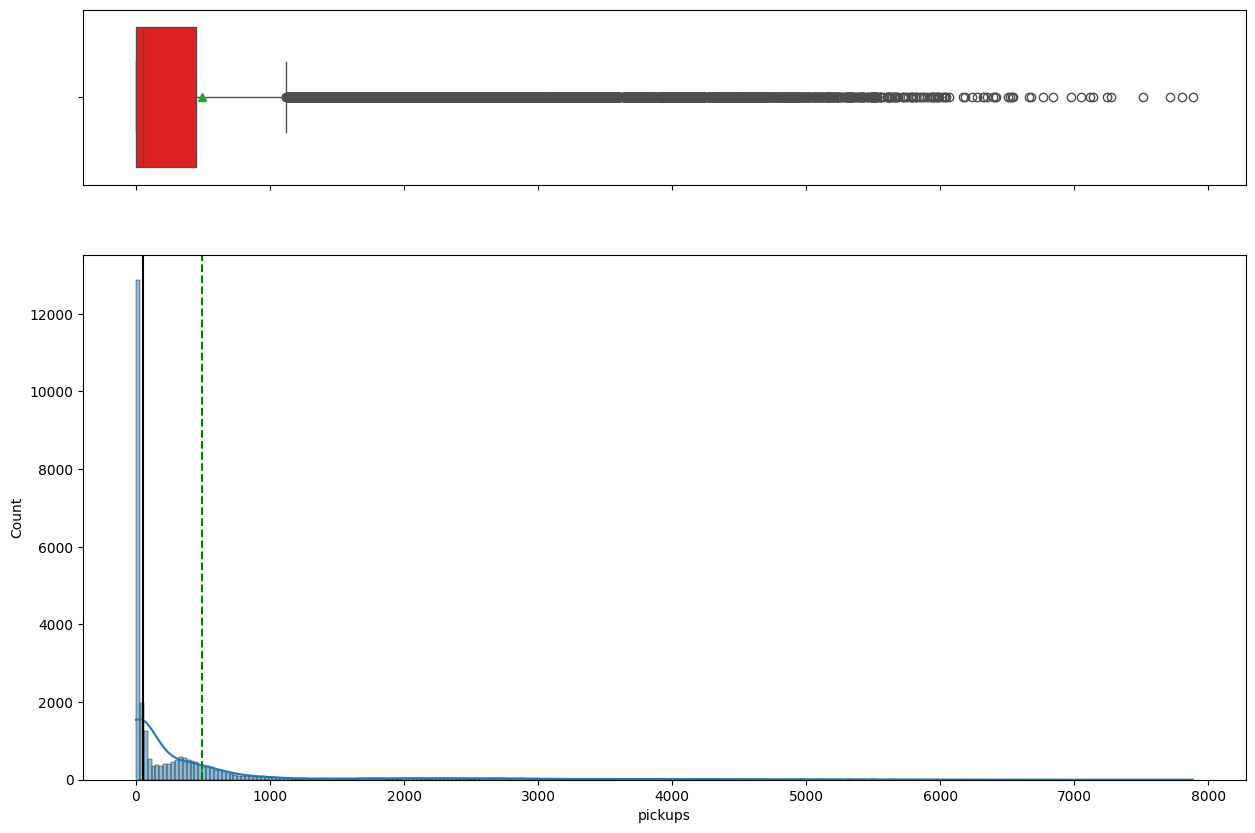

In [ ]:
histogram_boxplot(df.pickups)

**Observations:**
* The distribution of hourly pickups is highly right-skewed.
* The majority of the hourly pickups are close to 0.
* Median pickups are equal to 0, but the mean is ~500.
* There are a lot of outliers in this variable.
* While most hourly pickups are at the lower end, we have observations where hourly pickups went as high as 8000.

###  **Observations on Visibility**

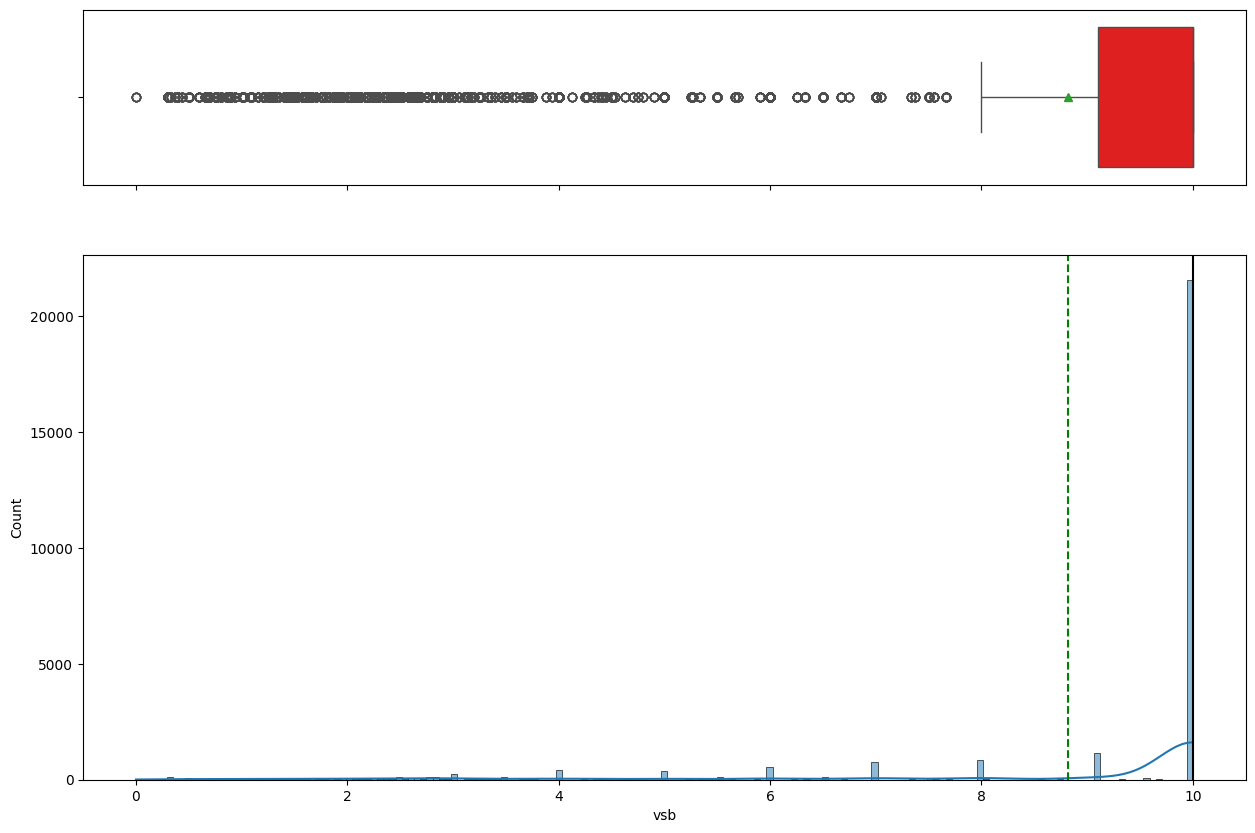

In [ ]:
histogram_boxplot(df.vsb)

**Observations:**
* The distribution of 'visibility' is left-skewed.
* Both the mean and the median are high, indicating that the visibility is good on most days.
* There are, however, outliers towards the left, indicating that visibility is extremely low on some days.
* It will be interesting to see how visibility affects the Uber pickup frequency.

### **Observations on Snow Depth**

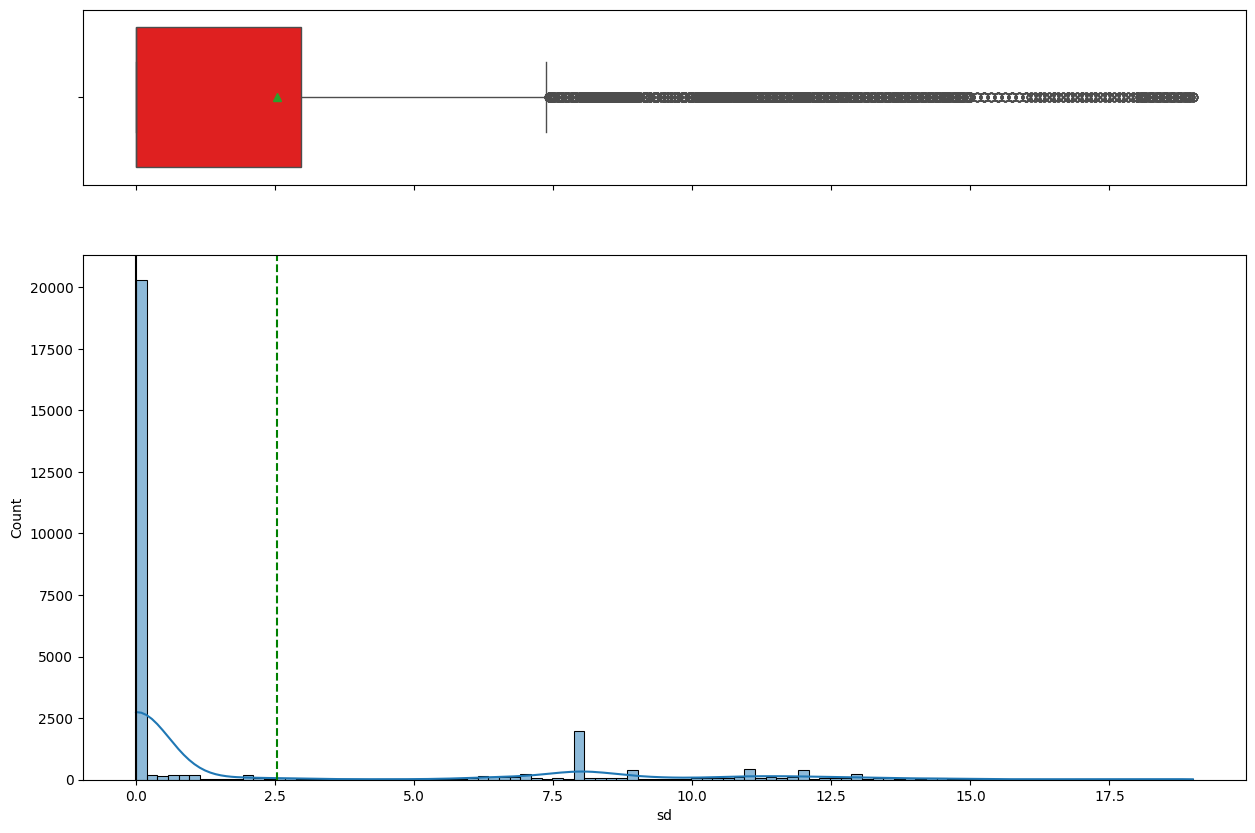

In [ ]:
histogram_boxplot(df.sd)

**Observations:**
* We observe that there is a snowfall in the period that we are analyzing.
* There are outliers in this variable.
* We will have to see how snowfall affects pickups. We know that very few people are likely to get out if it is snowing heavily, so our pickups would likely decrease when it snows.

**Now, let's explore the categorical variables.**

In [ ]:
def bar_perc(data, z):
    total = len(data[z]) # Length of the column
    plt.figure(figsize = (15, 5))

    # Convert the column to a categorical data type
    data[z] = data[z].astype('category')

    ax = sns.countplot(x=z, data=data, palette='Paired', order=data[z].value_counts().index)

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
        x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot
        y = p.get_y() + p.get_height()                              # Height of the plot
        ax.annotate(percentage, (x, y), size = 12)                  # Annotate the percentage

    plt.show()                                                      # Display the plot

### **Observations on holiday**

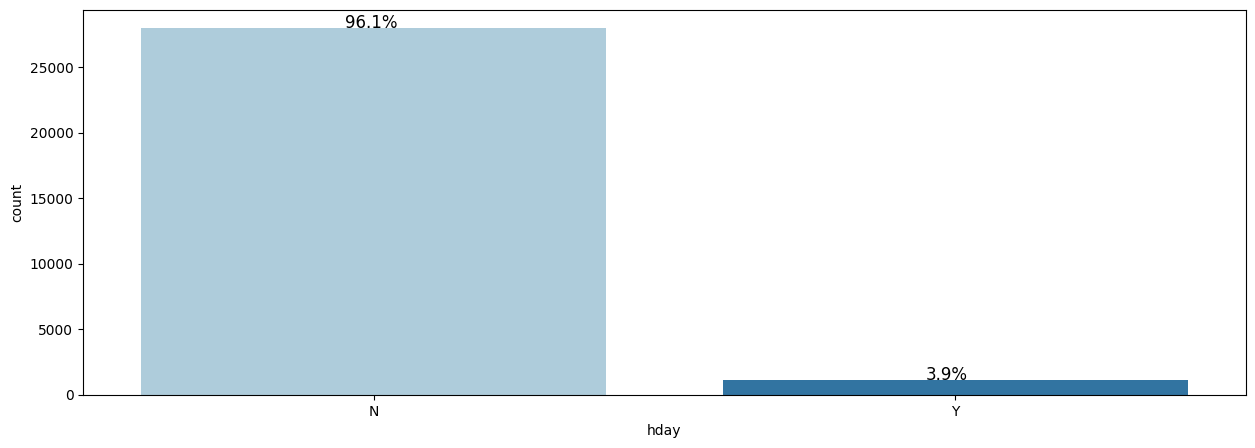

In [ ]:
bar_perc(df, 'hday')

**Observation:**

* Only 3.9% of days were holidays in the period that we are analyzing.

### **Observations on borough**

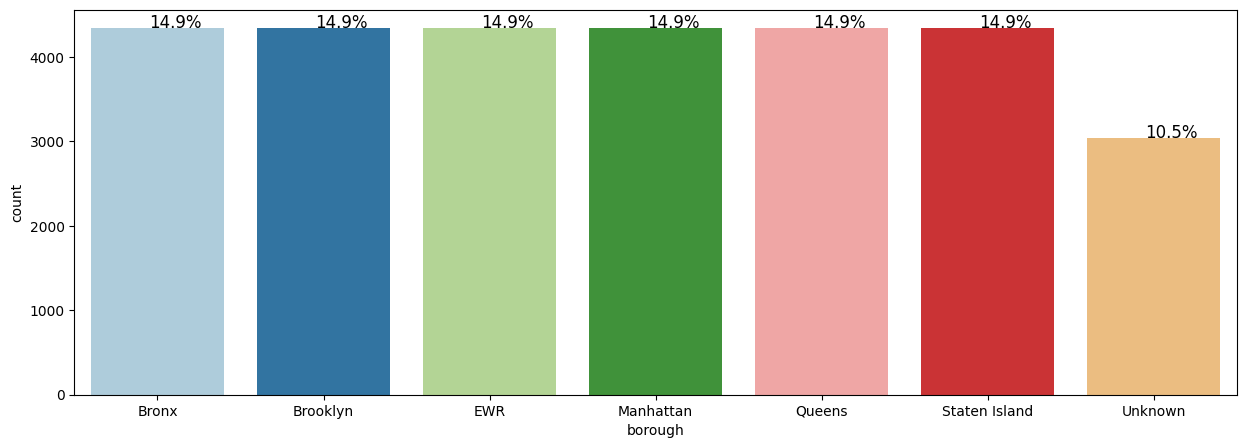

In [ ]:
bar_perc(df, 'borough')

**Observation:**

* The observations are uniformly distributed across the boroughs except for the observations that had NaN values and were attributed to the Unknown borough.

## **Exploratory Data Analysis: Multivariate**

**Let's plot multivariate charts between variables to understand their interaction with each other.**

### Correlation

In [ ]:
num_var = ['pickups', 'spd', 'vsb', 'temp', 'dewp', 'slp', 'pcp01', 'pcp06', 'pcp24', 'sd']
corr = df[num_var].corr()
corr
#corr = correlation, print dataframe

,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd
pickups,1.000000,0.011103,-0.007484,0.054857,0.033456,-0.015011,0.004406,-0.002909,-0.020219,-0.008241
spd,0.011103,1.000000,0.089056,-0.294548,-0.321730,-0.091698,-0.000250,0.016266,-0.010563,0.097919
vsb,-0.007484,0.089056,1.000000,0.023981,-0.232188,0.165451,-0.487121,-0.117681,0.000323,-0.048110
temp,0.054857,-0.294548,0.023981,1.000000,0.896665,-0.224439,-0.012767,-0.037722,-0.014382,-0.548750
dewp,0.033456,-0.321730,-0.232188,0.896665,1.000000,-0.310104,0.115585,0.012435,0.001250,-0.492485
slp,-0.015011,-0.091698,0.165451,-0.224439,-0.310104,1.000000,-0.088466,-0.103059,-0.133964,0.123538
pcp01,0.004406,-0.000250,-0.487121,-0.012767,0.115585,-0.088466,1.000000,0.126185,0.001017,-0.000974
pcp06,-0.002909,0.016266,-0.117681,-0.037722,0.012435,-0.103059,0.126185,1.000000,0.253583,0.040092
pcp24,-0.020219,-0.010563,0.000323,-0.014382,0.001250,-0.133964,0.001017,0.253583,1.000000,0.070604
sd,-0.008241,0.097919,-0.048110,-0.548750,-0.492485,0.123538,-0.000974,0.040092,0.070604,1.000000


negative corr = when x increaes, y decreases

postitive corr = when x increases, y increases

no correlation = no linear correlation, curved line, etc.., might be interactions

<Axes: >

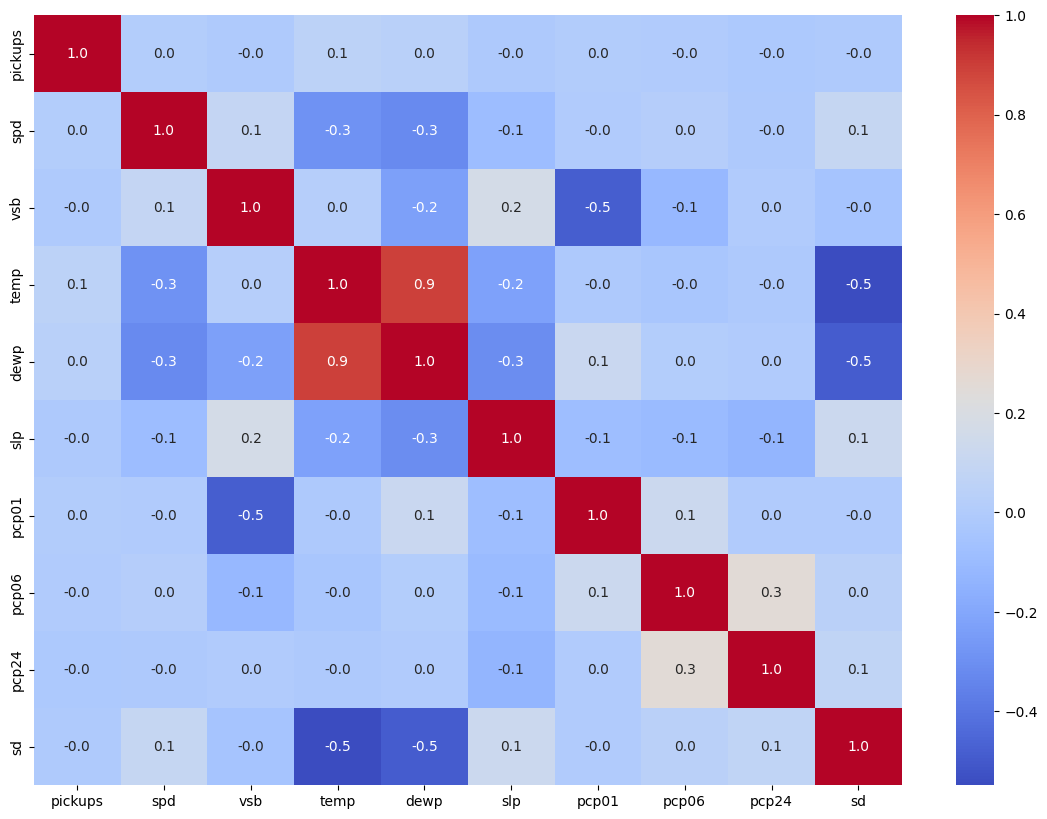

In [ ]:
# Check for correlation among numerical variables
num_var = ['pickups', 'spd', 'vsb', 'temp', 'dewp', 'slp', 'pcp01', 'pcp06', 'pcp24', 'sd']
corr = df[num_var].corr()

# Plot the heatmap
plt.figure(figsize = (14, 10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm',
        fmt = ".1f",
        xticklabels = corr.columns,
        yticklabels = corr.columns)

**Observations:**

* Dew point is an indication of humidity, which is correlated with temperature and the same thing can be observed in the heatmap as well. Temperature shows a high correlation with dew point.
* Visibility is negatively correlated with precipitation. If the rains are high during the hour, visibility is low. This is aligned with our intuitive understanding.
* Snow depth, of course, would be negatively correlated with the temperature.
* The wind speed and the sea level pressure are negatively correlated with the temperature.
* It is important to note that correlation does not imply causation.
* There does not seem to be a strong relationship between the number of pickups and weather stats.

## **Relationship between pickups and time based variables**

### **Pickups across Months**

In [ ]:
df.start_month

0        January
1        January
2        January
3        January
4        January
          ...   
29096       June
29097       June
29098       June
29099       June
29100       June
Name: start_month, Length: 29101, dtype: object

In [ ]:
#unique values of each month in start_month
cats = df.start_month.unique().tolist()
cats

['January', 'February', 'March', 'April', 'May', 'June']

In [ ]:
#pass in name of month to enforce relationship
cats = df.start_month.unique().tolist()
df.start_month = pd.Categorical(df.start_month, ordered = True, categories = cats)

In [ ]:
#now shows which months are larger than other months
df.start_month

0        January
1        January
2        January
3        January
4        January
          ...   
29096       June
29097       June
29098       June
29099       June
29100       June
Name: start_month, Length: 29101, dtype: category
Categories (6, object): ['January' < 'February' < 'March' < 'April' < 'May' < 'June']

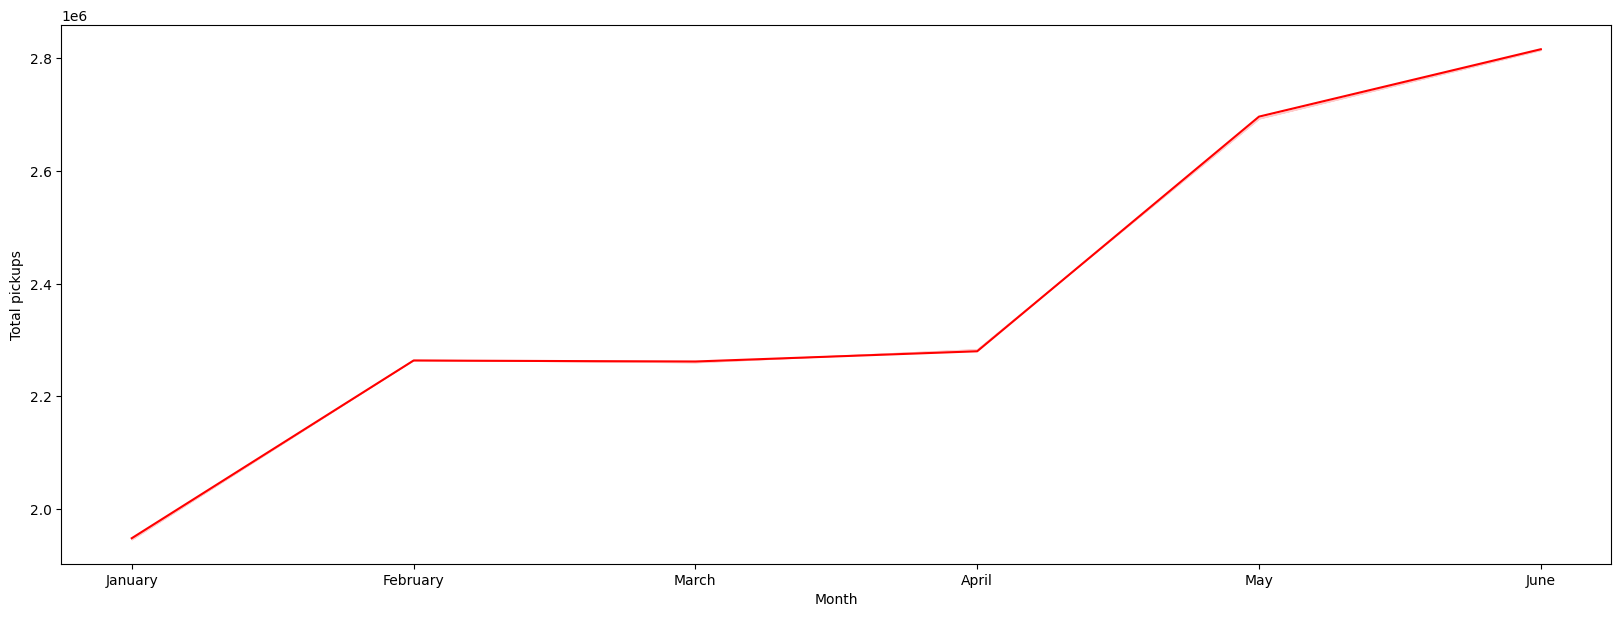

In [ ]:
#estimator = sum
plt.figure(figsize = (20, 7))
sns.lineplot(x = "start_month", y = "pickups", data = df, ci = 0, color = "RED", estimator = 'sum')
plt.ylabel('Total pickups')
plt.xlabel('Month')
plt.show()

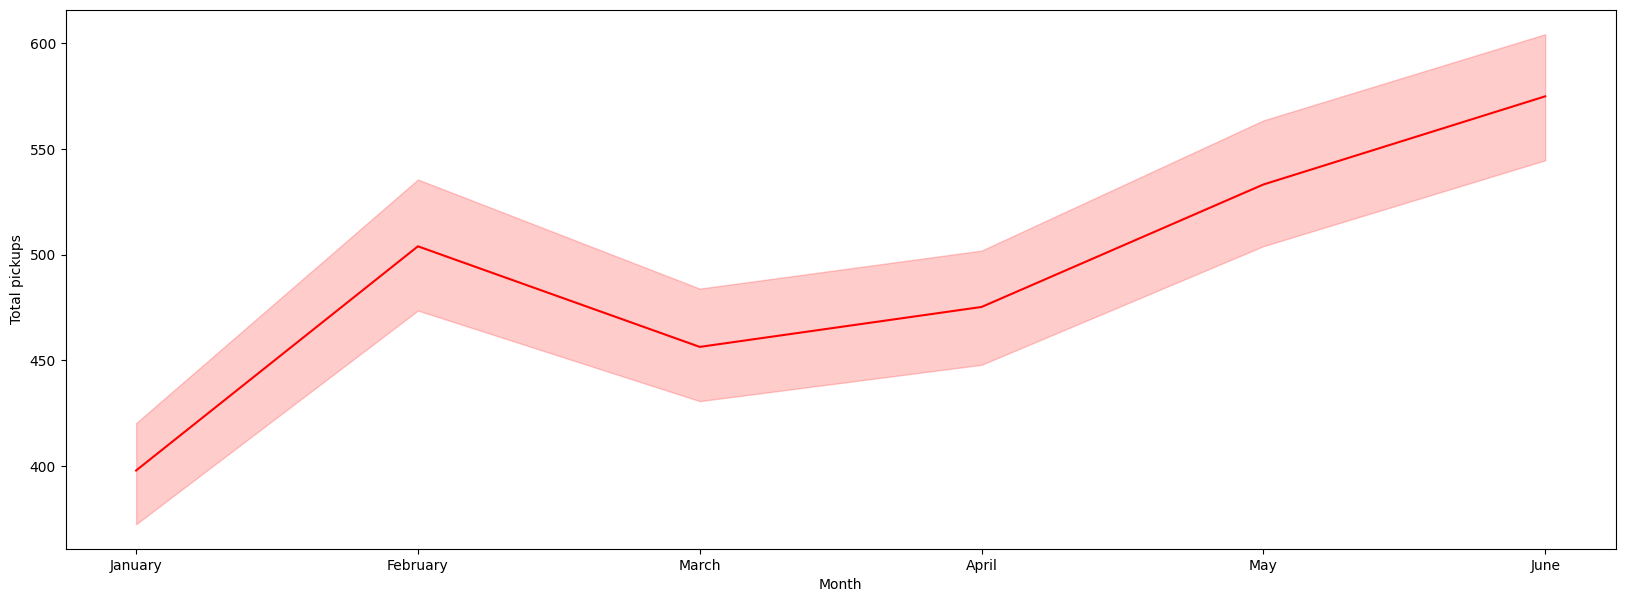

In [ ]:
#etimator = mean, confidence interval = 95% - e.g. feb has less days so don't want to use sum
plt.figure(figsize = (20, 7))
sns.lineplot(x = "start_month", y = "pickups", data = df, ci =95, color = "RED", estimator = 'mean')
plt.ylabel('Total pickups')
plt.xlabel('Month')
plt.show()

**Observations:**
* There is a clear increasing trend in monthly bookings.
* Bookings in June are almost 1.5 times that of Jan.

### **Pickups vs Days of the Month**

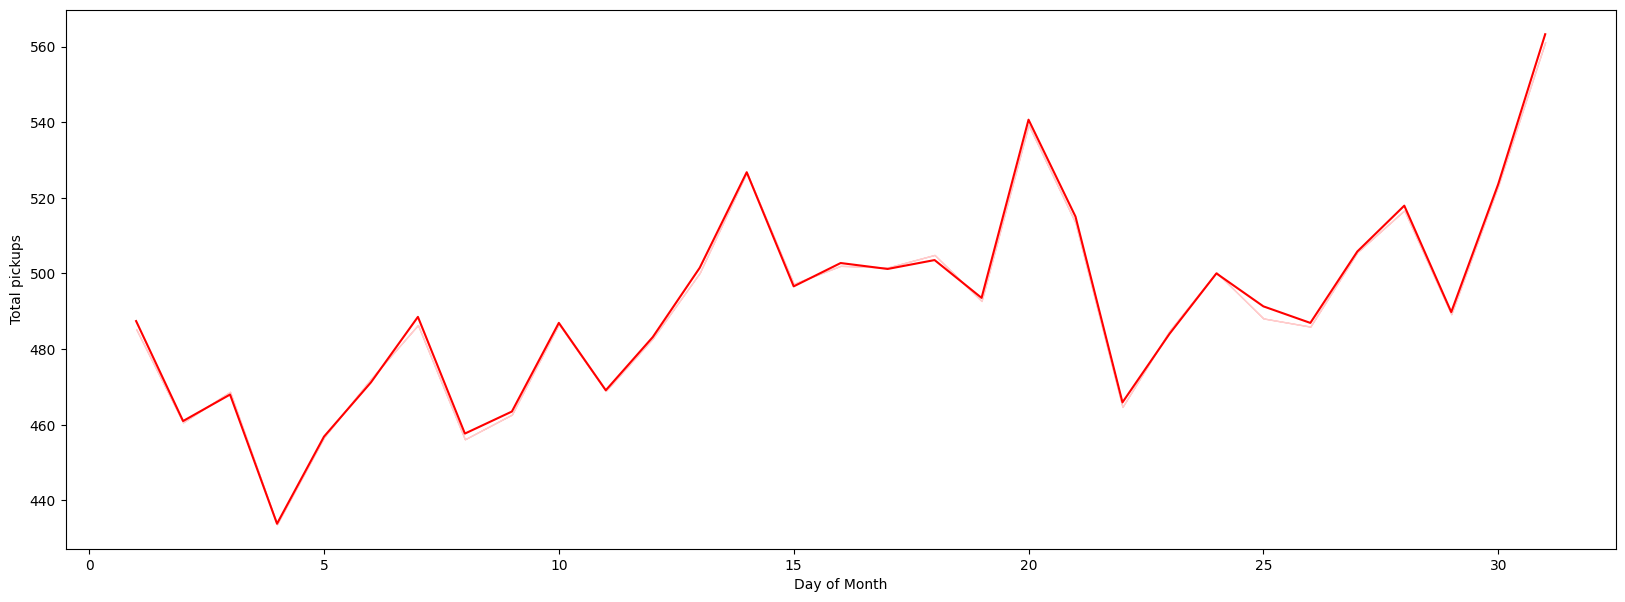

In [ ]:
plt.figure(figsize = (20, 7))
sns.lineplot(x = "start_day", y = "pickups", estimator = 'mean', ci = 0, data = df, color = "RED")
plt.ylabel('Total pickups')
plt.xlabel('Day of Month')
plt.show()

**Observations:**
* Number of pickups are low towards the end of the month (29th - 31st).
* Number of pickups for 31 might be low because not all months have the 31st day.
* There is a peak in the bookings around the 20th day of the month.

### **Pickups across Weekdays**

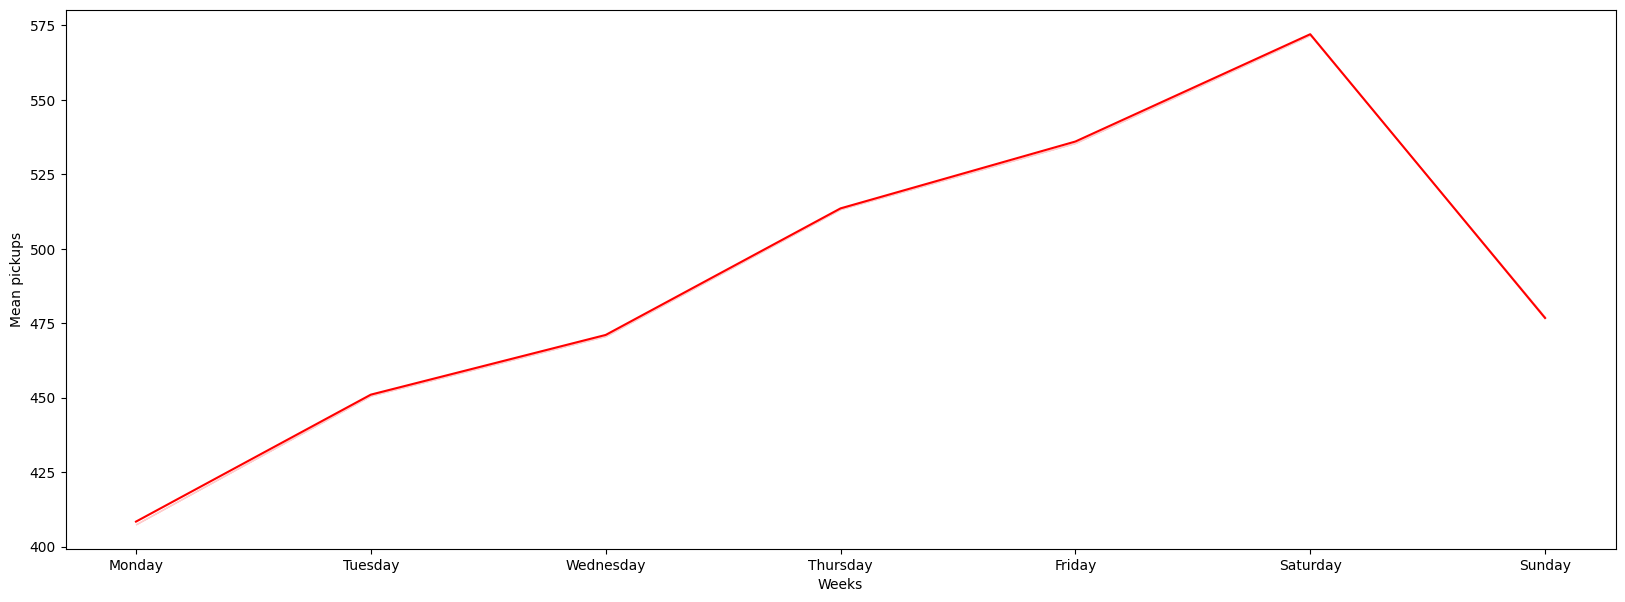

In [ ]:
#estimator by default = mean for lineplot
cats = ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
df.week_day = pd.Categorical(df.week_day, ordered = True, categories = cats)
plt.figure(figsize = (20, 7))
sns.lineplot(x = "week_day", y = "pickups", ci = 0, data = df, color = "RED")
plt.ylabel('Mean pickups')
plt.xlabel('Weeks')
plt.show()

**Observations:**
* Pickups gradually increase as the week progresses and starts dropping after Saturday.
* We need to do more investigation to understand why the demand for Uber is low at the beginning of the week.

### **Pickups across Boroughs**

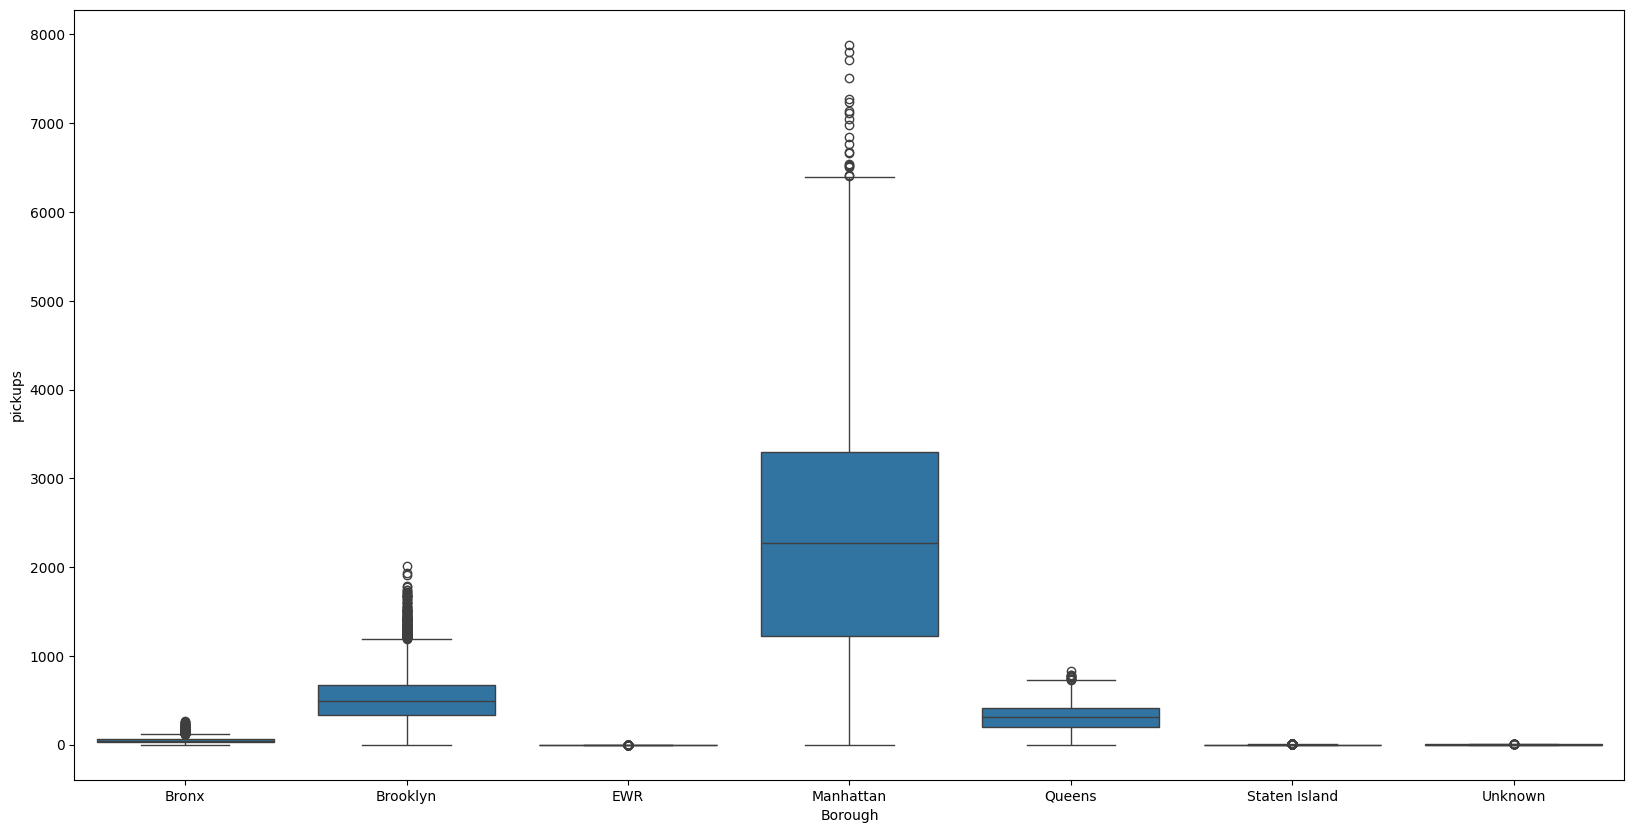

In [ ]:
plt.figure(figsize = (20, 10))
sns.boxplot(x='borough', y='pickups', data=df)
plt.ylabel('pickups')
plt.xlabel('Borough')
plt.show()

In [ ]:
#create new column to change scale
df['logpickups'] = np.log10(df.pickups+1)
df['logpickups']

0        2.184691
1        3.181844
2        0.000000
3        3.720903
4        2.608526
           ...   
29096    0.000000
29097    3.583085
29098    2.764176
29099    0.000000
29100    0.602060
Name: logpickups, Length: 29101, dtype: float64

In [ ]:
#can also take sq root
df['sqrtpickups'] = np.sqrt(df.pickups+1)
df['sqrtpickups']

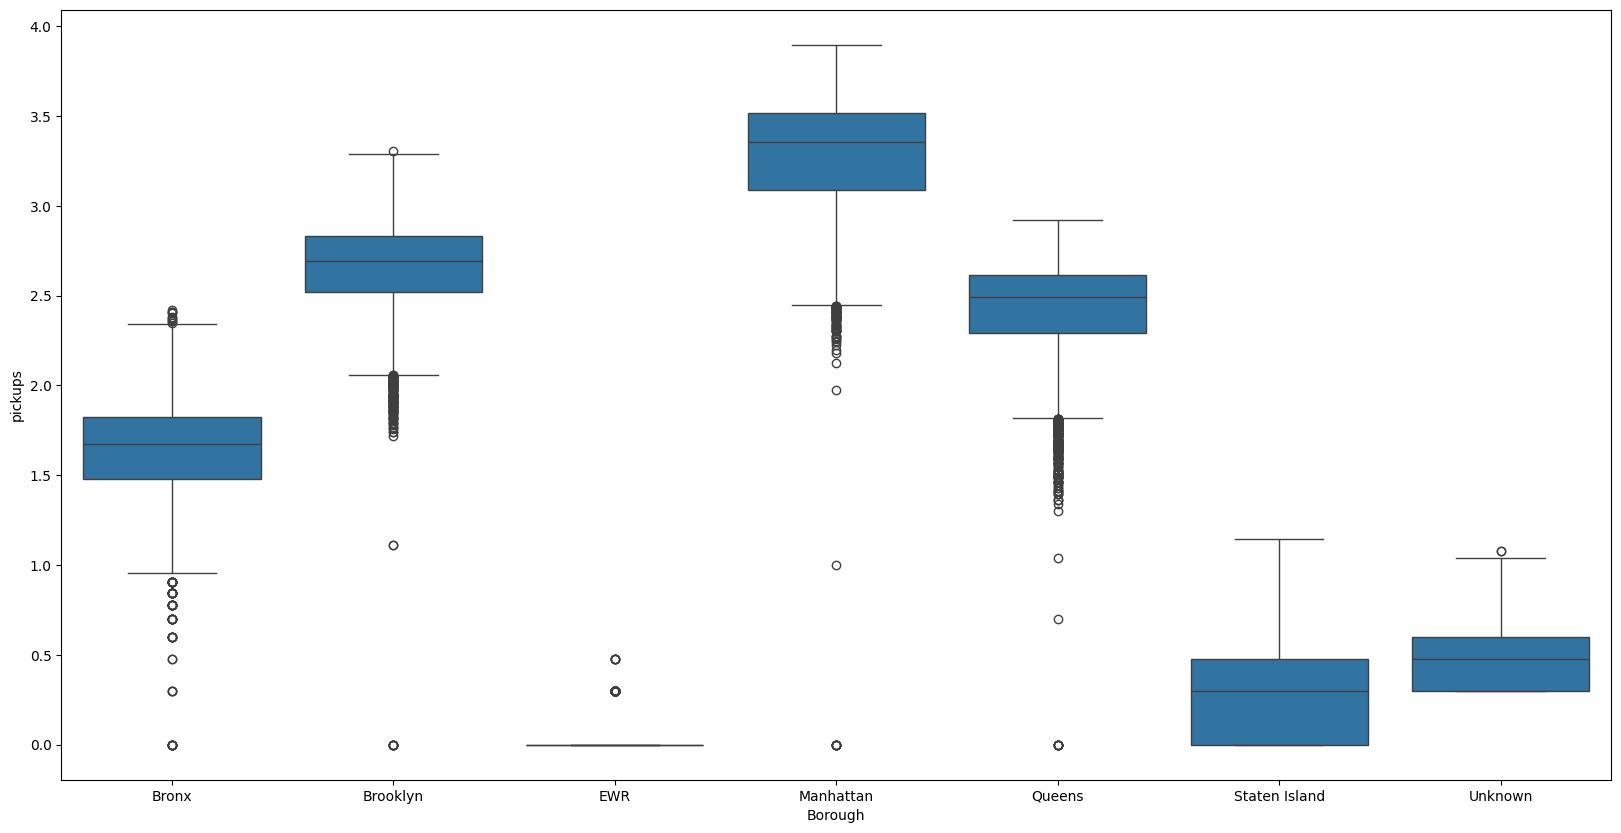

In [ ]:
#change sns.boxplot y='logpickups' to update scale
plt.figure(figsize = (20, 10))
sns.boxplot(x='borough', y='logpickups', data=df)
plt.ylabel('pickups')
plt.xlabel('Borough')
plt.show()

**Observations:**
* There is a clear difference in ridership across the different boroughs.
* Manhattan has the highest number of bookings.
* Brooklyn and Queens are distant followers.
* EWR, Unknown, and Staten Island have a very low number of bookings. The demand is so small that probably it can be covered by the drop-offs of the inbound trips from other areas.

### **Relationship between Pickups and Holidays**

In [ ]:
#groupby pass in one variable
df.groupby(by=['hday']).mean()

,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,start_year,start_hour,start_day,logpickups
hday,,,,,,,,,,,,,,
N,492.339957,5.990027,8.807175,47.778272,30.857505,1017.801140,0.003941,0.024651,0.084638,2.534446,2015.0,11.596283,15.753574,1.586350
Y,437.199822,5.857568,9.091432,44.942670,29.963440,1018.237199,0.001062,0.063018,0.235886,2.397469,2015.0,11.629795,12.367529,1.572526


In [ ]:
df.groupby('hday')['pickups'].mean()

hday
N    492.339957
Y    437.199822
Name: pickups, dtype: float64

In [ ]:
#hierarchichal group by - borough then hoiday, then take mean
df.groupby(by = ['borough','hday']).mean()

pickups       spd       vsb       temp       dewp  \
borough       hday                                                          
Bronx         N       50.771073  6.004750  8.809249  47.598782  30.687809   
              Y       48.065868  5.882236  9.089531  44.743912  29.819860   
Brooklyn      N      534.727969  6.004750  8.809249  47.598782  30.687809   
              Y      527.011976  5.882236  9.089531  44.743912  29.819860   
EWR           N        0.023467  6.004750  8.809249  47.598782  30.687809   
              Y        0.041916  5.882236  9.089531  44.743912  29.819860   
Manhattan     N     2401.302921  6.004750  8.809249  47.598782  30.687809   
              Y     2035.928144  5.882236  9.089531  44.743912  29.819860   
Queens        N      308.899904  6.004750  8.809249  47.598782  30.687809   
              Y      320.730539  5.882236  9.089531  44.743912  29.819860   
Staten Island N        1.606082  6.004750  8.809249  47.598782  30.687809   
              Y        1.497006  5.882236  9.089531  44.743912  29.819860   
Unknown       N        2.057456  5.863861  8.789403  49.316339  32.311646   
              Y        2.050420  5.649860  9.107437  46.616246  31.172409   

                            slp     pcp01     pcp06     pcp24        sd  \
borough       hday                                                        
Bronx         N     1017.798587  0.003929  0.024589  0.085073  2.542325   
              Y     1018.168263  0.001108  0.063202  0.240134  2.390719   
Brooklyn      N     1017.798587  0.003929  0.024589  0.085073  2.542325   
              Y     1018.168263  0.001108  0.063202  0.240134  2.390719   
EWR           N     1017.798587  0.003929  0.024589  0.085073  2.542325   
              Y     1018.168263  0.001108  0.063202  0.240134  2.390719   
Manhattan     N     1017.798587  0.003929  0.024589  0.085073  2.542325   
              Y     1018.168263  0.001108  0.063202  0.240134  2.390719   
Queens        N     1017.798587  0.003929  0.024589  0.085073  2.542325   
              Y     1018.168263  0.001108  0.063202  0.240134  2.390719   
Staten Island N     1017.798587  0.003929  0.024589  0.085073  2.542325   
              Y     1018.168263  0.001108  0.063202  0.240134  2.390719   
Unknown       N     1017.823016  0.004041  0.025181  0.080910  2.466926   
              Y     1018.817647  0.000672  0.061475  0.200123  2.454307   

                    start_year  start_hour  start_day  logpickups  
borough       hday                                                 
Bronx         N         2015.0   11.500000  15.735632    1.631638  
              Y         2015.0   11.568862  12.353293    1.613090  
Brooklyn      N         2015.0   11.500000  15.735632    2.652568  
              Y         2015.0   11.568862  12.353293    2.654326  
EWR           N         2015.0   11.500000  15.735632    0.006915  
              Y         2015.0   11.568862  12.353293    0.012618  
Manhattan     N         2015.0   11.500000  15.735632    3.270352  
              Y         2015.0   11.568862  12.353293    3.209405  
Queens        N         2015.0   11.500000  15.735632    2.413942  
              Y         2015.0   11.568862  12.353293    2.427663  
Staten Island N         2015.0   11.500000  15.735632    0.336557  
              Y         2015.0   11.568862  12.353293    0.316867  
Unknown       N         2015.0   12.421341  15.907319    0.452559  
              Y         2015.0   12.142857  12.487395    0.451500

In [ ]:
# Check if the trend is similar across boroughs
df.groupby(by = ['borough','hday'])['pickups'].mean()

borough        hday
Bronx          N         50.771073
               Y         48.065868
Brooklyn       N        534.727969
               Y        527.011976
EWR            N          0.023467
               Y          0.041916
Manhattan      N       2401.302921
               Y       2035.928144
Queens         N        308.899904
               Y        320.730539
Staten Island  N          1.606082
               Y          1.497006
Unknown        N          2.057456
               Y          2.050420
Name: pickups, dtype: float64

In [ ]:
#in general, hoilday vs. non-holiday pickups w/ borough removed
df.groupby(by = ['hday'])['pickups'].mean()

hday
N    492.339957
Y    437.199822
Name: pickups, dtype: float64

**Observations:**
1. The mean pickups on holidays are lesser than a non-holiday.
2. Except for Manhattan, mean pickups on holidays are pretty similar to non-holiday pickups.
3. In Queens, mean pickups on holidays are higher.
4. There are hardly any pickups in EWR.

### **Relationship between Pickups and Hour of the day across Boroughs**

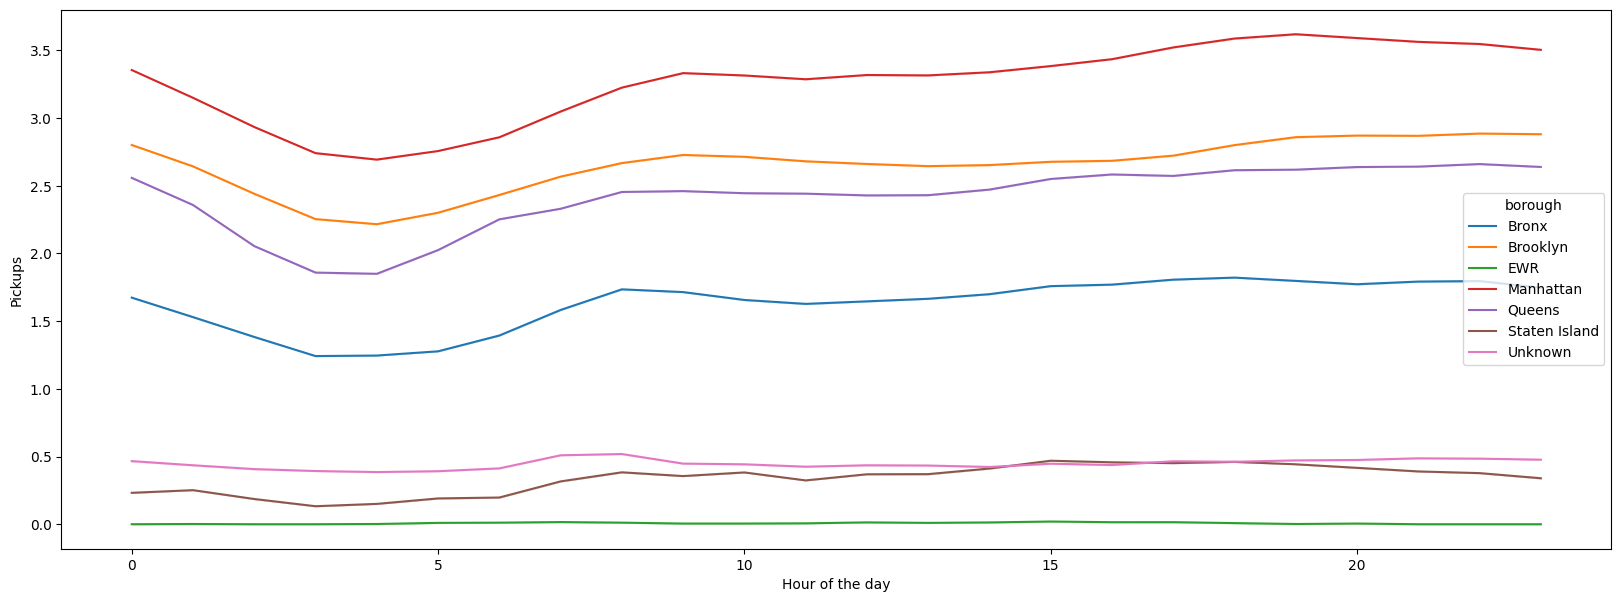

In [ ]:
plt.figure(figsize = (20, 7))
sns.lineplot(x = "start_hour", y = "logpickups", ci = 0, data = df, hue = 'borough')
plt.ylabel('Pickups')
plt.xlabel('Hour of the day')
plt.show()

**Observations:**

* Bookings peak around the 19th and 20th hour of the day and decreases till 5 AM.
* The peak can be attributed to the time people leave their workplaces.
* From 5 AM onwards, we can see an increasing trend till 10, possibly the office rush.
* Pickups go down from 10 AM to 12 PM post that they start increasing.
* The number of pickups in Manhattan is very high and dominant when we see the spread across boroughs.
* We cannot observe the distribution for EWR and Staten Island boroughs in this plot due to the very low count in these boroughs. Let's try converting the pickups on a logarithmic scale to visualize all the boroughs.

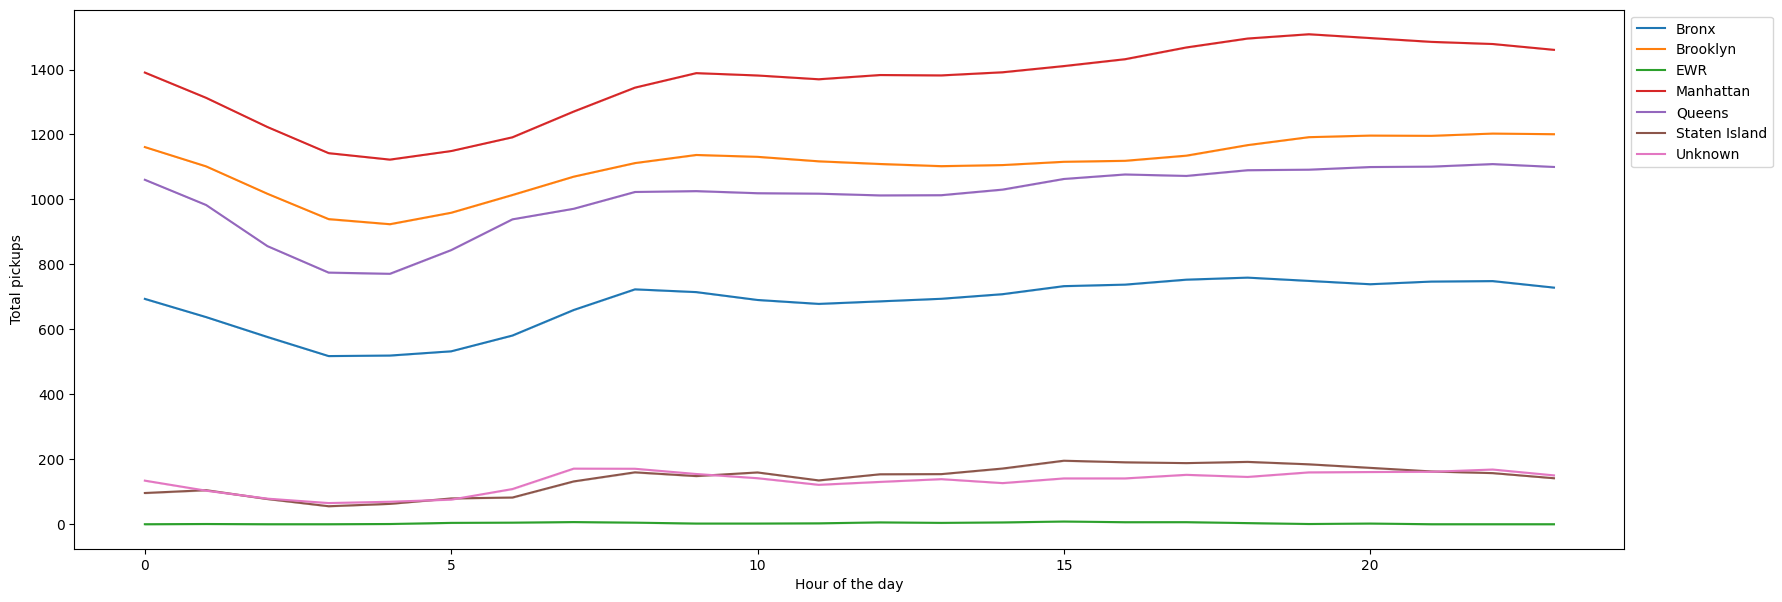

In [ ]:
#other way to show log of pickups, less skewed data
plt.figure(figsize = (20, 7))
sns.lineplot(x = df.start_hour, y = np.log1p(df.pickups), estimator ='sum', ci = 0, hue = df.borough)
plt.ylabel('Total pickups')
plt.xlabel('Hour of the day')
plt.legend(bbox_to_anchor = (1, 1))
plt.show()

**Observations:**
* Hourly pattern can be seen in almost all the boroughs.
* After applying the logarithmic scale, it is obvious that the four major boroughs follow the same pattern.
* EWR seems to have a random demand with a majority of the values being zero.
* Manhattan sees the most Uber pickups. Let us explore this borough in more detail.

### Manhattan Pickups Heatmap - Weekday vs Hour

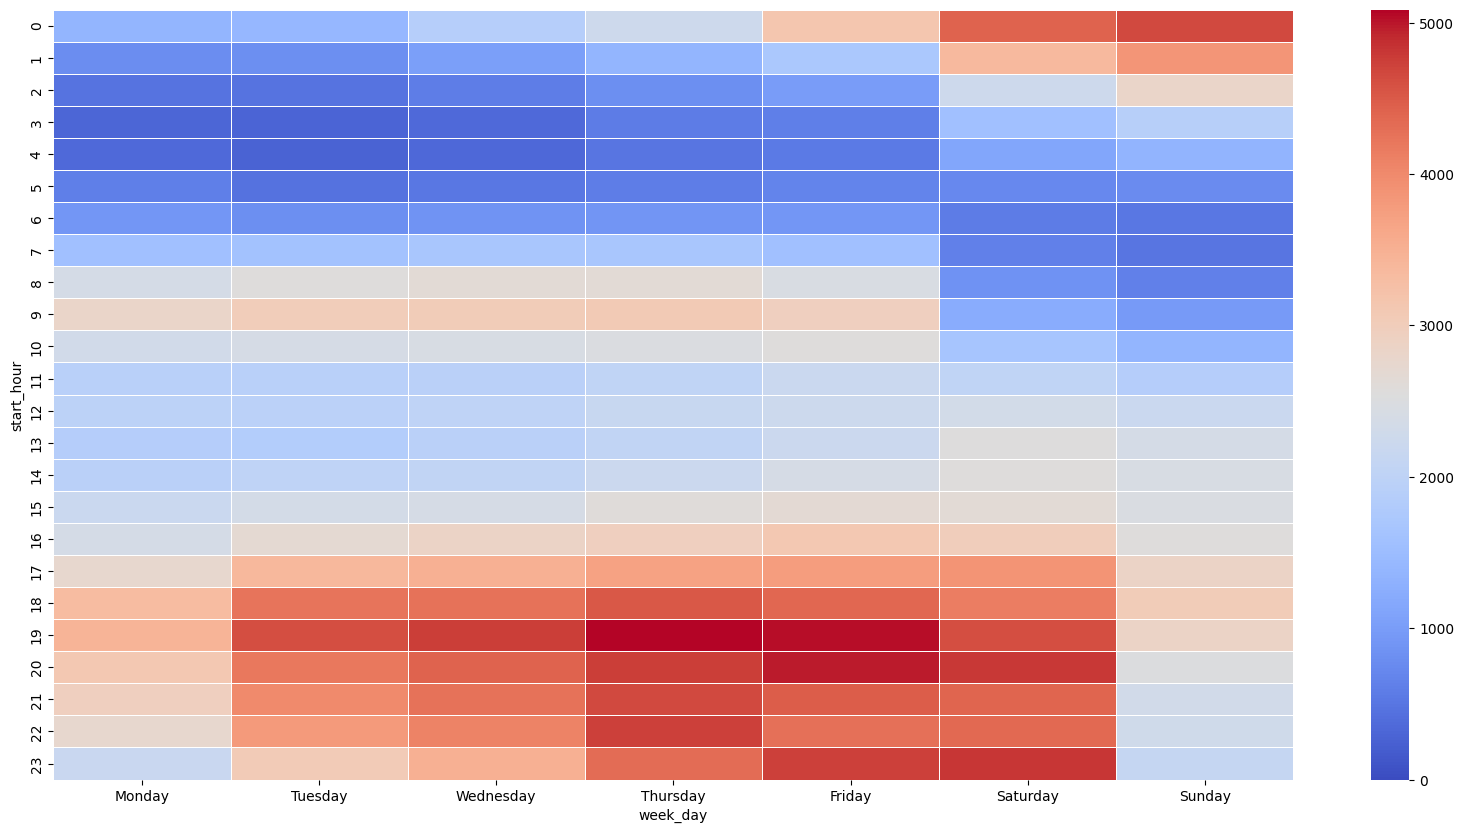

In [ ]:
df_man = df[df.borough == 'Manhattan']
df_hm = df_man.pivot_table(index = 'start_hour', columns = 'week_day', values = 'pickups')

# Draw a heatmap
plt.figure(figsize = (20, 10)) # To resize the plot
sns.heatmap(df_hm,  fmt = "d", cmap = 'coolwarm', linewidths = .5, vmin = 0)
plt.show()

In [ ]:
#pivot table from above, aggregaed by mean according to documentation
df_hm

week_day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
start_hour,,,,,,,
0,1356.269231,1393.884615,1887.36,2253.040000,3143.461538,4412.692308,4651.423077
1,789.769231,801.192308,1022.08,1357.230769,1726.346154,3375.461538,3861.692308
2,474.807692,467.038462,582.68,809.461538,979.423077,2256.615385,2806.884615
3,314.692308,280.730769,346.00,567.576923,607.346154,1563.230769,1895.269231
4,352.692308,272.576923,326.84,479.884615,547.384615,1128.115385,1336.307692
5,596.115385,455.423077,497.88,587.884615,658.461538,733.346154,757.346154
6,905.653846,800.038462,857.20,886.384615,896.846154,565.000000,509.000000
7,1556.500000,1604.923077,1676.00,1675.384615,1559.269231,616.230769,496.115385
8,2376.923077,2564.961538,2656.04,2657.961538,2463.423077,834.500000,632.115385


In [ ]:
df_man

,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,start_year,start_month,start_hour,start_day,week_day,logpickups
3,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday,3.720903
10,Manhattan,4345,3.0,10.0,30.0,6.0,1023.0,0.0,0.0,0.0,0.0,Y,2015,January,2,1,Thursday,3.638090
17,Manhattan,4577,5.0,10.0,30.0,8.0,1022.3,0.0,0.0,0.0,0.0,Y,2015,January,3,1,Thursday,3.660676
24,Manhattan,3003,5.0,10.0,29.0,9.0,1022.0,0.0,0.0,0.0,0.0,Y,2015,January,4,1,Thursday,3.477700
31,Manhattan,1313,5.0,10.0,28.0,9.0,1021.8,0.0,0.0,0.0,0.0,Y,2015,January,5,1,Thursday,3.118595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29071,Manhattan,4585,5.0,10.0,80.0,58.0,1012.5,0.0,0.0,0.0,0.0,N,2015,June,19,30,Tuesday,3.661434
29078,Manhattan,4210,8.0,10.0,80.0,58.0,1012.4,0.0,0.0,0.0,0.0,N,2015,June,20,30,Tuesday,3.624385
29085,Manhattan,4313,7.0,10.0,76.0,61.0,1012.4,0.0,0.0,0.0,0.0,N,2015,June,21,30,Tuesday,3.634880
29091,Manhattan,4452,5.0,10.0,76.0,64.0,1011.9,0.0,0.0,0.0,0.0,N,2015,June,22,30,Tuesday,3.648653


**Observations:**

* The demand for Uber peaks during the late hours of the day when people are returning home from the office.
* Demand continues to be high during the late hours of the day (midnight) on Fridays and Saturdays.  
* It is odd that the demand for Uber is not as high on Monday evenings in comparison to other working days.

## **Conclusion and Recommendations**

-----------------------------------------------------------------
### **Conclusion**
-----------------------------------------------------------------

We analyzed a dataset of nearly 30K hourly Uber pickup information, from New York boroughs.
The data spanned every day of the first six months of the year 2015.
The main feature of interest here is the number of pickups.
From an environmental and business perspective, having cars roaming in an area while the demand is in another or filling the streets with cars during a low demand period while lacking during peak hours is inefficient. Thus, we determined the factors that affect pickup and the nature of their effect.

We have been able to conclude that:

1. Uber cabs are most popular in the Manhattan area of New York.
2. Contrary to intuition, weather conditions do not have much impact on the number of Uber pickups.
3. The demand for Uber has been increasing steadily over the months (Jan to June).
4. The rate of pickups is higher on the weekends in comparison to weekdays.
5. It is encouraging to see that New Yorkers trust Uber taxi services when they step out to enjoy their evenings.
6. We can also conclude that people use Uber for regular office commutes. The demand steadily increases from 6 AM to 10 AM, then declines a little and starts picking up till midnight. The demand peaks at 7-8 PM.
7. We need to further investigate the low demand for Uber on Mondays.

--------------------------------------------------
### **Recommendation to business**
--------------------------------------------------

1. Manhattan is the most mature market for Uber. Brooklyn, Queens, and Bronx show potential.
2. There has been a gradual increase in Uber rides over the last few months, and we need to keep up the momentum.
3. Riderships are high at peak office commute hours on weekdays and during late evenings on Saturdays. Cab availability must be ensured during these times.
4. The demand for cabs is the highest on Saturday nights. Cab availability must be ensured during this time of the week.
5. Procure data for fleet size availability to get a better understanding of the demand-supply status and build a machine learning model to accurately predict pickups per hour, to optimize the cab fleet in respective areas.
6. Procure more data on price and build a model that can predict optimal pricing.

---------------------------------
###  **Further Analysis**
---------------------------------
1. Dig deeper to explore the variation of cab demand, during working days and non-working days. You can combine Weekends+Holidays to be non-working days and weekdays to be the working days.
2. Drop the boroughs that have negligible pickups and then analyze the data to uncover more insights.